In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df_score = pd.read_csv("score.txt", sep=" ", header=0)



In [3]:
df_score

,i,name,total_amount,reward,type
0,0,Karmine,133386.469511,0,Allgame
1,0,Opportunist,129315.215337,0,Allgame
2,0,GP_agent_1,185165.307390,3268,Allgame
3,0,Splitter,117416.058151,0,Allgame
4,0,Pretender,205357.469666,0,Allgame
...,...,...,...,...,...
16495,498,GP_agent_1,100824.296146,2246,3_Karmines
16496,499,GP_agent_1,105545.967272,2248,3_Karmines
16497,499,Karmine,314768.630290,0,3_Karmines
16498,499,Karmine,314768.630290,0,3_Karmines


In [4]:
df_GP_1=df_score.where(df_score["name"] == "GP_agent_1").dropna().reset_index(drop=True)

/tmp/ipykernel_28160/2003712565.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.lineplot(data = df_GP_1, x = "i", y = 'total_amount', hue = 'type', ci=None)


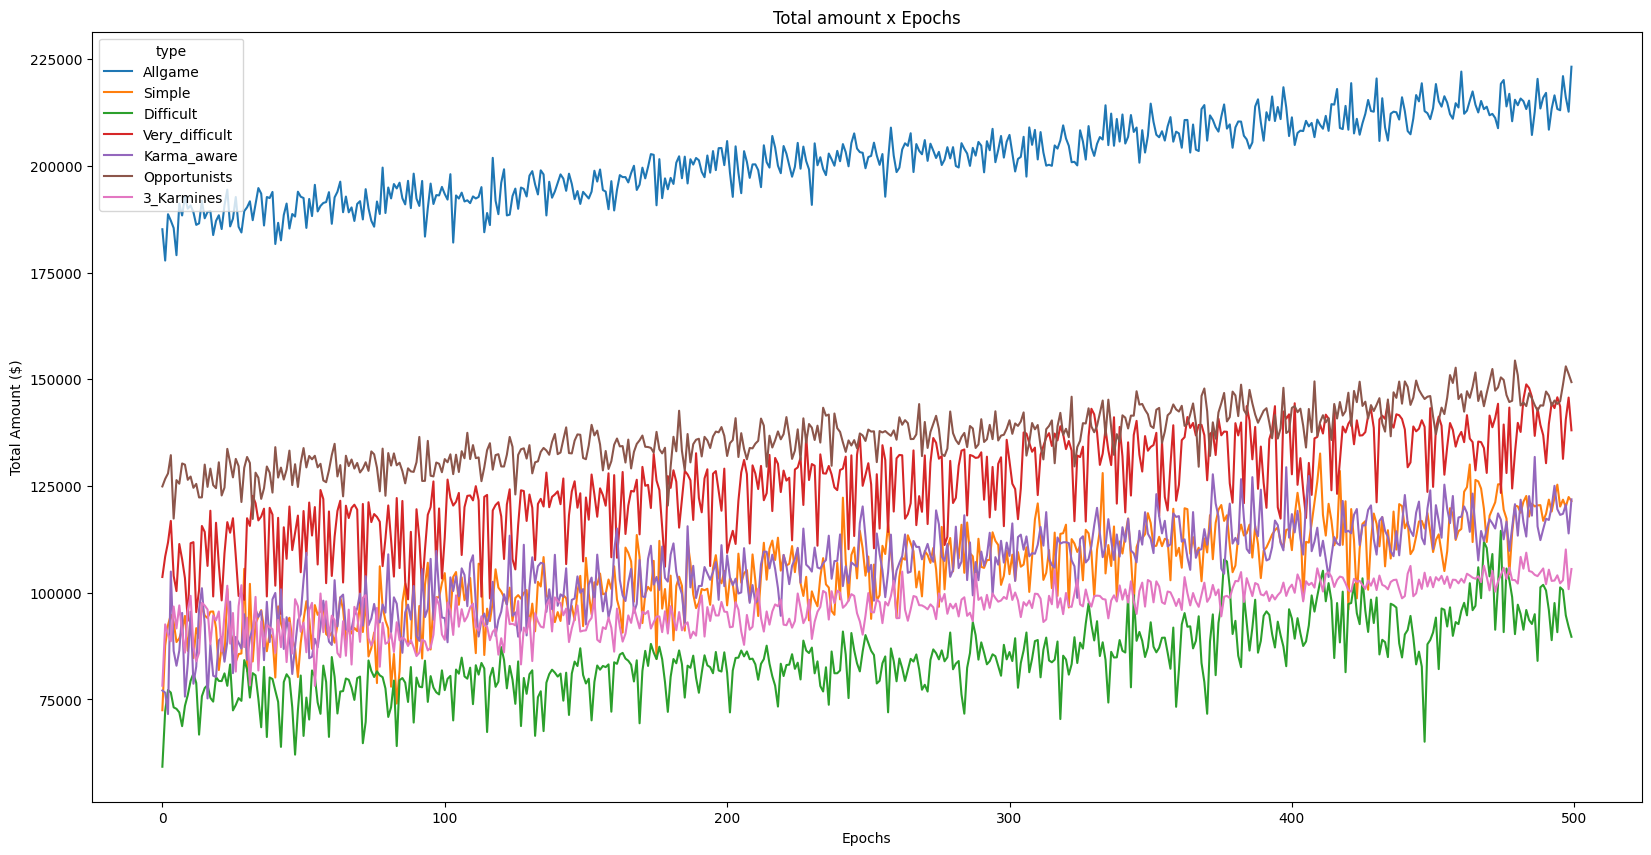

In [5]:
# pivot the data into the correct shape
plt.figure(figsize=(20,10))
sn.lineplot(data = df_GP_1, x = "i", y = 'total_amount', hue = 'type', ci=None)
plt.title("Total amount x Epochs")
plt.ylabel("Total Amount ($)")
plt.xlabel("Epochs")
plt.show()


/tmp/ipykernel_28160/805902606.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.lineplot(data = df_GP_1, x = "i", y = 'reward', hue = 'type',ci=None)


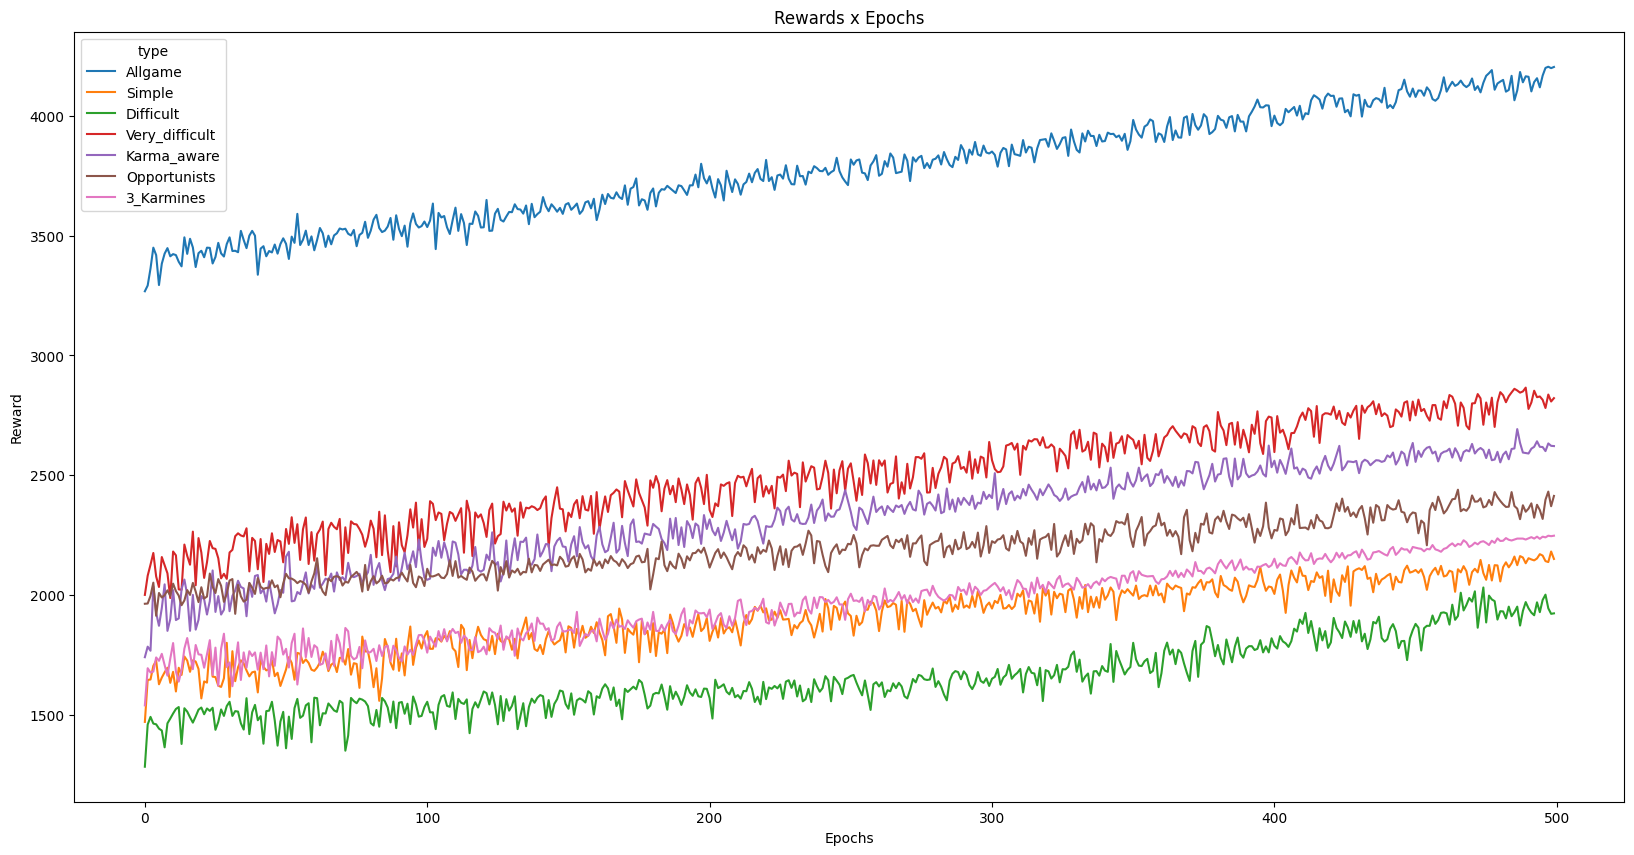

In [6]:
plt.figure(figsize=(20,10))
sn.lineplot(data = df_GP_1, x = "i", y = 'reward', hue = 'type',ci=None)
plt.title("Rewards x Epochs")
plt.ylabel("Reward")
plt.xlabel("Epochs")
plt.show()

/tmp/ipykernel_28160/2832437895.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.lineplot(data = df_score, x = "i", y = 'total_amount', hue = 'name', ci=None)


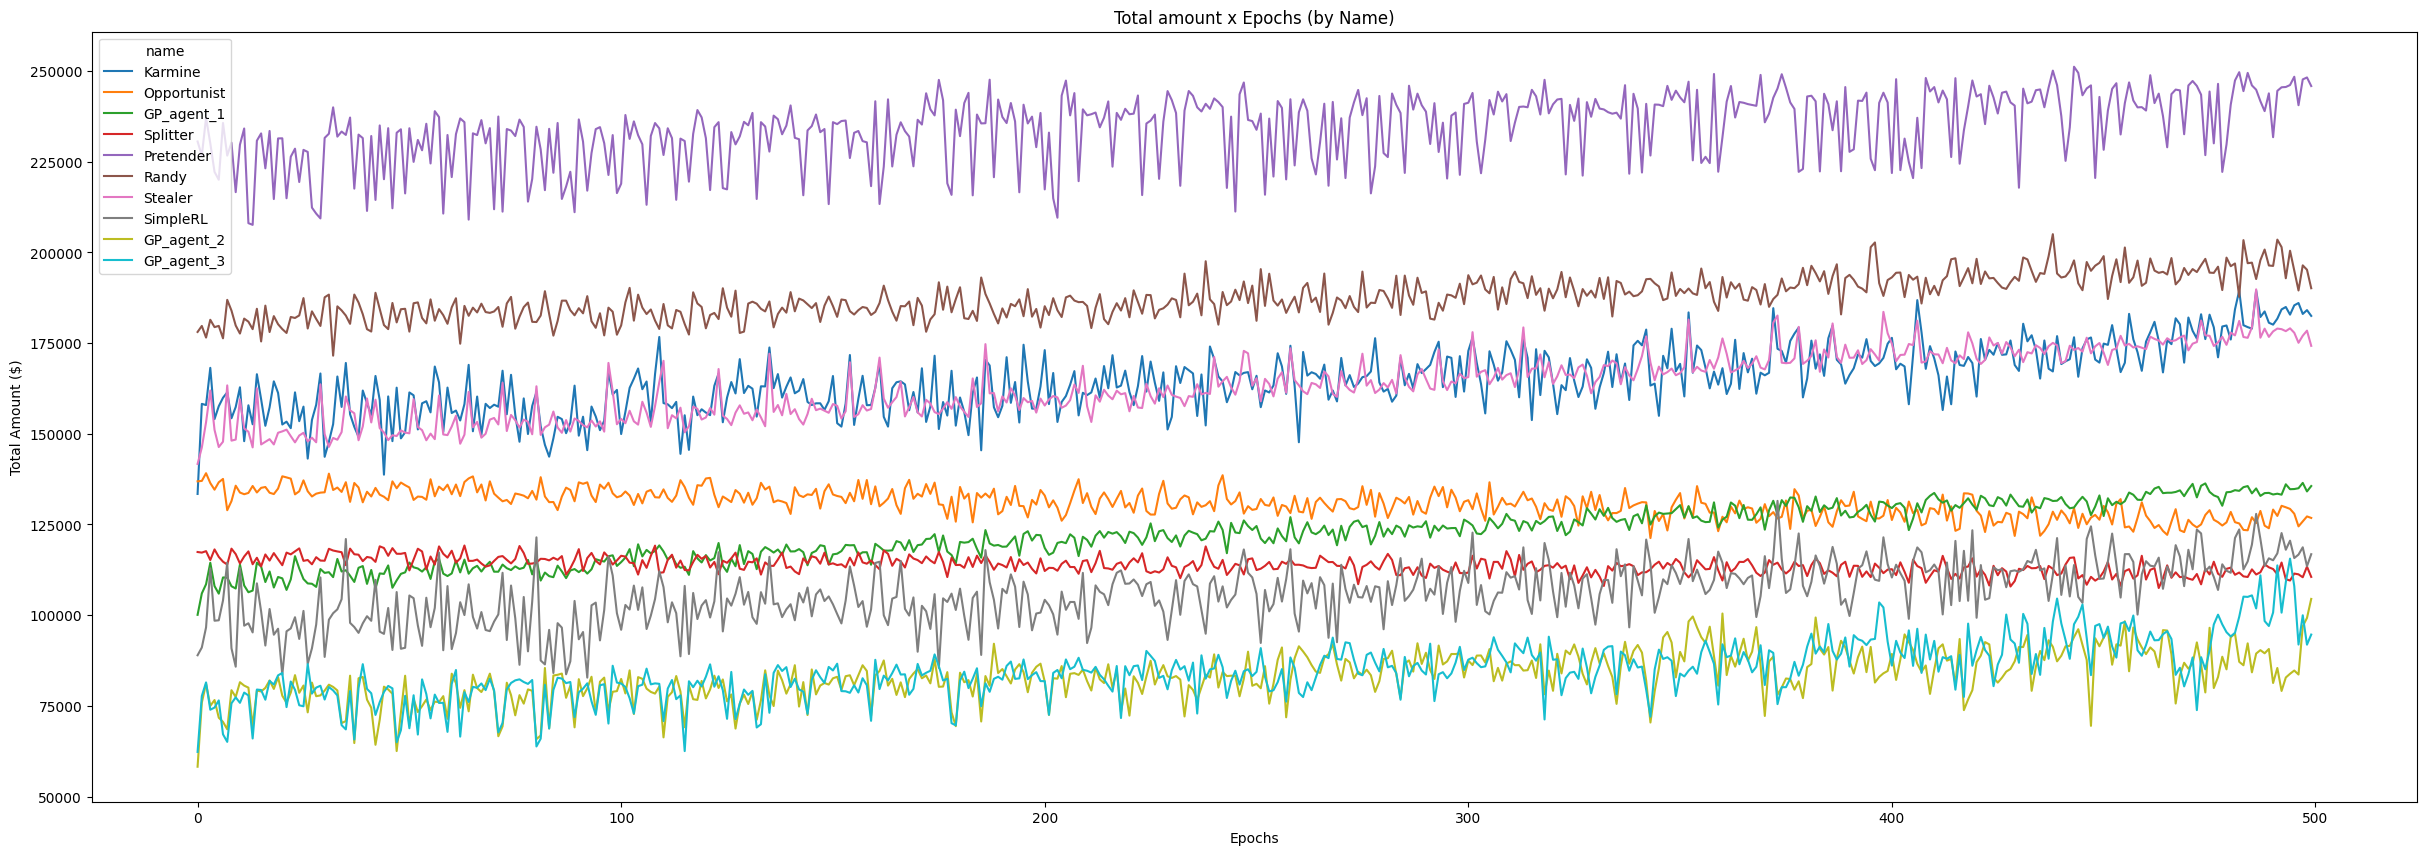

In [7]:
plt.figure(figsize=(30,10))
sn.lineplot(data = df_score, x = "i", y = 'total_amount', hue = 'name', ci=None)
plt.title("Total amount x Epochs (by Name)")
plt.ylabel("Total Amount ($)")
plt.xlabel("Epochs")
plt.show()

In [8]:
df_Allgame=df_score.where(df_score["type"] == "Allgame").dropna().reset_index(drop=True)
df_Simple=df_score.where(df_score["type"] == "Simple").dropna().reset_index(drop=True)
df_Difficult=df_score.where(df_score["type"] == "Difficult").dropna().reset_index(drop=True)
df_Very_difficult=df_score.where(df_score["type"] == "Very_difficult").dropna().reset_index(drop=True)
df_Karma_aware=df_score.where(df_score["type"] == "Karma_aware").dropna().reset_index(drop=True)
df_Opportunists=df_score.where(df_score["type"] == "Opportunists").dropna().reset_index(drop=True)
df_3_Karmines=df_score.where(df_score["type"] == "3_Karmines").dropna().reset_index(drop=True)


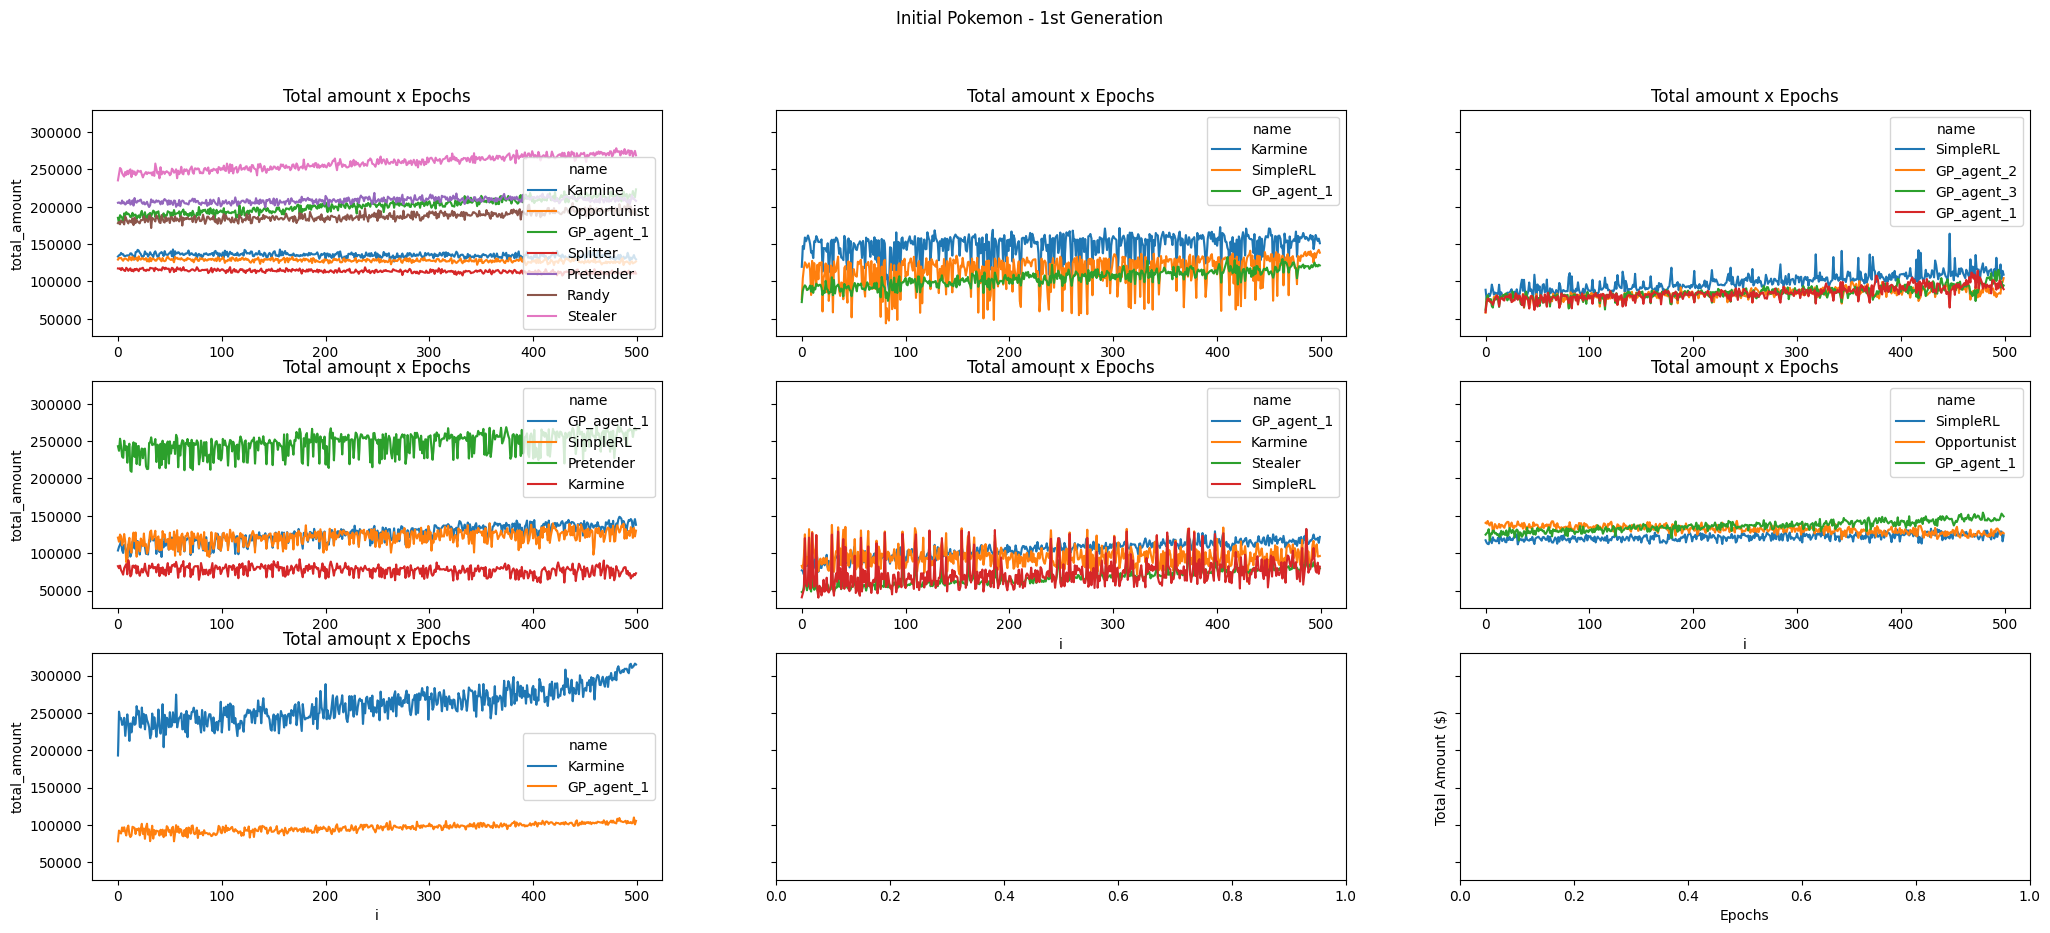

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(25, 10), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')

sn.lineplot(ax=axes[0, 0],data = df_Allgame, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[0, 1],data = df_Simple, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[0, 2],data = df_Difficult, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[1, 0],data = df_Very_difficult, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[1, 1],data = df_Karma_aware, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[1, 2],data = df_Opportunists, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[2, 0],data = df_3_Karmines, x = "i", y = 'total_amount', hue = 'name')
axes[0][0].set_title("Total amount x Epochs")
axes[0][1].set_title("Total amount x Epochs")
axes[0][2].set_title("Total amount x Epochs")
axes[1][0].set_title("Total amount x Epochs")
axes[1][1].set_title("Total amount x Epochs")
axes[1][2].set_title("Total amount x Epochs")
axes[2][0].set_title("Total amount x Epochs")
plt.ylabel("Total Amount ($)")
plt.xlabel("Epochs")
plt.show()

In [10]:
plt.figure(figsize=(20,10))

plt.show()

<Figure size 2000x1000 with 0 Axes>

In [11]:
plt.figure(figsize=(20,10))

plt.show()

<Figure size 2000x1000 with 0 Axes>

In [12]:
plt.figure(figsize=(20,10))

plt.show()

<Figure size 2000x1000 with 0 Axes>

In [13]:
plt.figure(figsize=(20,10))

plt.show()

<Figure size 2000x1000 with 0 Axes>

In [14]:
plt.figure(figsize=(20,10))

plt.show()

<Figure size 2000x1000 with 0 Axes>

In [15]:
plt.figure(figsize=(20,10))

plt.show()

<Figure size 2000x1000 with 0 Axes>